# Experimenting with Seaborn Barplot
Seaborn data is from [here](https://github.com/mwaskom/seaborn-data)

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
# Loading the tips dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


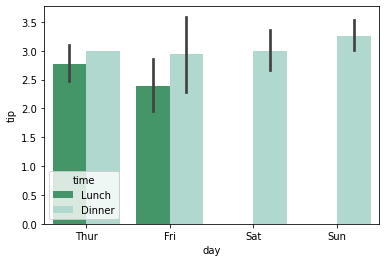

In [4]:
# Which day and time of the week did customers tip most?
sns.barplot(data=tips, x='day', y='tip', hue='time', palette = 'BuGn_r')

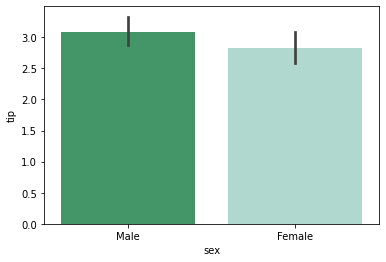

In [5]:
# Who tips more? (mere sum)
sns.barplot(data=tips, x='sex', y='tip', palette = 'BuGn_r')

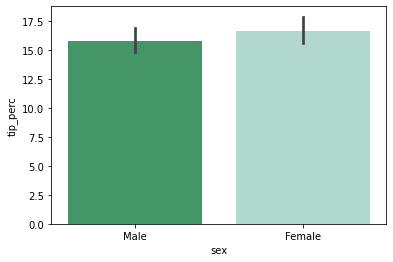

In [6]:
# Who really tips more? (tipping percentage)
tips['tip_perc'] = (tips['tip']/tips['total_bill']) * 100
sns.barplot(data=tips, x='sex', y='tip_perc', palette = 'BuGn_r')

Yes    163
No      81
Name: is_weekend, dtype: int64


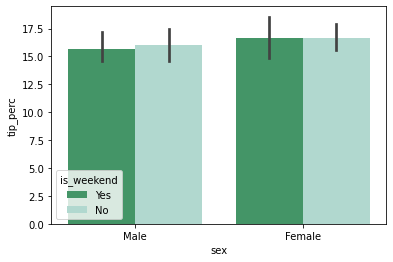

In [7]:
# Do people tip more/less during the day/weekend?

# Creating 'Weekend' column (Thur/Fri: 'No', Sat/Sun: 'Yes')
tips.loc[tips['day'] == 'Thur', 'is_weekend'] = 'No'
tips.loc[tips['day'] == 'Fri', 'is_weekend'] = 'No'
tips.loc[tips['day'] == 'Sat', 'is_weekend'] = 'Yes'
tips.loc[tips['day'] == 'Sun', 'is_weekend'] = 'Yes'
print(tips['is_weekend'].value_counts())

# Comparing the tipping percentage between weekdays & weekends
sns.barplot(data=tips, x='sex', y='tip_perc', hue='is_weekend', palette = 'BuGn_r')

Sat-Dinner     87
Sun-Dinner     76
Thur-Lunch     61
Fri-Dinner     12
Fri-Lunch       7
Thur-Dinner     1
Name: day_time, dtype: int64


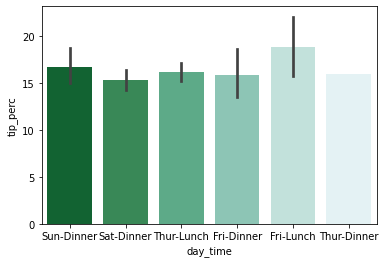

In [8]:
# When are people most generous?

# Creating a new column combining day of week & time
for i in range(len(tips)):
    tips.loc[i,'day_time'] = f"{tips.iloc[i].day}-{tips.iloc[i].time}"
print(tips.day_time.value_counts())

# Plotting tip_perc by day_time
sns.barplot(data=tips, x='day_time', y='tip_perc', palette = 'BuGn_r')

In [10]:
# Splitting customers into smokers vs non-smokers
smoker_data = tips[tips.smoker=='Yes']
non_smoker_data = tips[tips.smoker=='No']

In [11]:
smoker_data.describe()

,total_bill,tip,size,tip_perc
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319604
std,9.832154,1.401468,0.810751,8.511920
min,3.070000,1.000000,1.000000,3.563814
25%,13.420000,2.000000,2.000000,10.677083
50%,17.920000,3.000000,2.000000,15.384615
75%,26.860000,3.680000,3.000000,19.505852
max,50.810000,10.000000,5.000000,71.034483


In [12]:
non_smoker_data.describe()

,total_bill,tip,size,tip_perc
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932846
std,8.255582,1.377190,1.017984,3.990977
min,7.250000,1.000000,1.000000,5.679667
25%,13.325000,2.000000,2.000000,13.690561
50%,17.590000,2.740000,2.000000,15.562472
75%,22.755000,3.505000,3.000000,18.501403
max,48.330000,9.000000,6.000000,29.198966
